<a href="https://colab.research.google.com/github/hediyeorhan/IsaretDili_CNN/blob/main/IsaretDili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri Seti linki : https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
X = np.load('/content/drive/My Drive/IsaretDili/X.npy')
y = np.load('/content/drive/My Drive/IsaretDili/Y.npy')

In [5]:
print(X.shape)
print(y.shape)

(2062, 64, 64)
(2062, 10)


In [6]:
def visualize_image(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

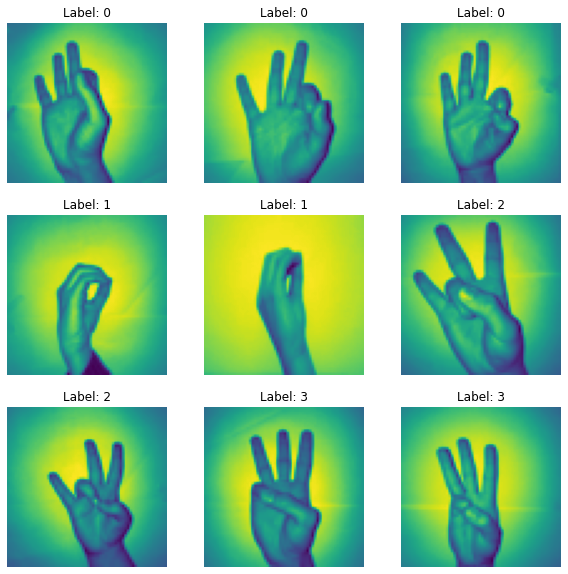

In [7]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    visualize_image(X[i * 100], label="Label: " + str(np.argmax(y[i * 100])))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1 ,64, 64, 1)

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8, (3, 3), activation = "relu", input_shape = (64, 64, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, "relu"),
                                    tf.keras.layers.Dense(64, "relu"),
                                    tf.keras.layers.Dense(10, activation = "softmax")])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          1

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1443, 64, 64, 1)
(1443, 10)
(619, 64, 64, 1)
(619, 10)


In [12]:
model.compile(optimizer = RMSprop(lr=0.001), loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      self.model.stop_training = True

callbacks = myCallback()
history = model.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test), callbacks = [callbacks])

Epoch 1/100
46/46 [==============================] - 5s 76ms/step - loss: 2.3043 - accuracy: 0.1071 - val_loss: 2.2858 - val_accuracy: 0.1745
Epoch 2/100
46/46 [==============================] - 3s 67ms/step - loss: 2.1523 - accuracy: 0.2342 - val_loss: 1.8532 - val_accuracy: 0.2585
Epoch 3/100
46/46 [==============================] - 3s 68ms/step - loss: 1.3484 - accuracy: 0.5610 - val_loss: 1.3038 - val_accuracy: 0.4798
Epoch 4/100
46/46 [==============================] - 3s 68ms/step - loss: 0.8464 - accuracy: 0.7287 - val_loss: 1.2726 - val_accuracy: 0.5460
Epoch 5/100
46/46 [==============================] - 3s 68ms/step - loss: 0.5858 - accuracy: 0.8041 - val_loss: 0.8074 - val_accuracy: 0.7044
Epoch 6/100
46/46 [==============================] - 3s 69ms/step - loss: 0.5436 - accuracy: 0.8347 - val_loss: 1.1104 - val_accuracy: 0.6478
Epoch 7/100
46/46 [==============================] - 3s 68ms/step - loss: 0.4842 - accuracy: 0.8462 - val_loss: 0.7273 - val_accuracy: 0.7544
Epoch 

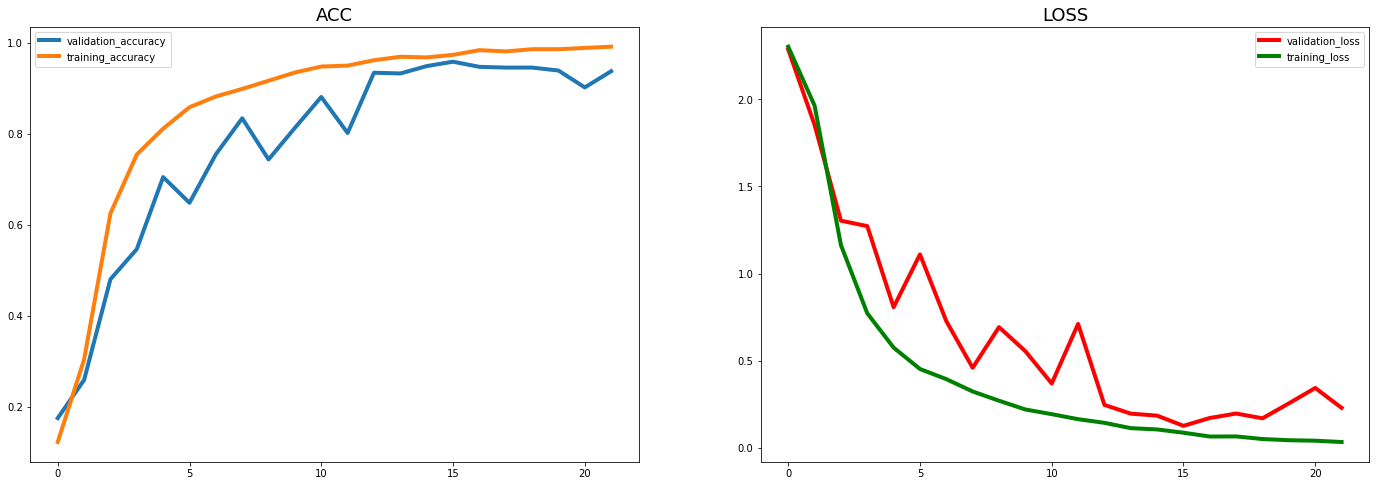

In [14]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", linewidth=4)
plt.legend()
plt.title("ACC" ,fontsize=18)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", color="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", color="green", linewidth=4)
plt.legend()

plt.title("LOSS" ,fontsize=18)

plt.show()

In [15]:
y_pred = model.predict(X_test)

In [17]:
y_pred[0:5][0]

array([9.1926438e-08, 2.2678445e-07, 3.0257921e-03, 2.6848134e-02,
       3.2309984e-08, 3.1240443e-06, 9.7011077e-01, 3.6039823e-06,
       8.0037789e-06, 2.0281867e-07], dtype=float32)

In [18]:
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

In [19]:
print(y_pred_classes[0:5])
print(y_true[0:5])

[6 9 3 9 6]
[6 9 3 9 0]


In [41]:
print("Accuracy Score : ", accuracy_score(y_true, y_pred_classes))

Accuracy Score :  0.9369951534733441


Text(0.5, 1.0, 'Tahminler ve Gerçek Değerler - HeapMap')

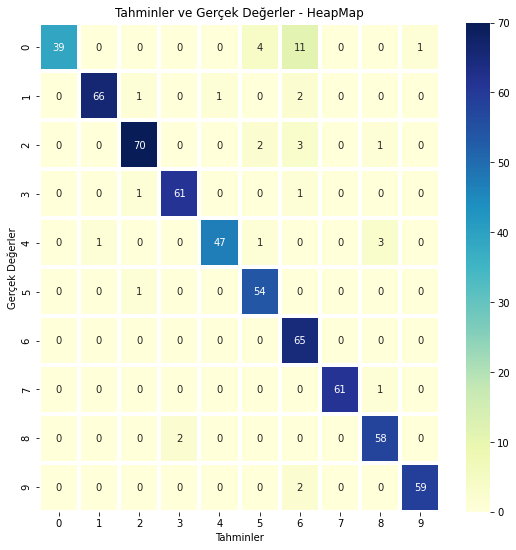

In [20]:
plt.figure(figsize = (9, 9))
cm = confusion_matrix(y_true, y_pred_classes) 
sns.heatmap(cm, annot = True, fmt = "d", linewidth = 3, cmap="YlGnBu")
plt.xlabel("Tahminler")
plt.ylabel("Gerçek Değerler")
plt.title("Tahminler ve Gerçek Değerler - HeapMap")

In [87]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
 # Tahmin edilmesini istediğimiz görselimizi bilgisayarımıza indirip yüklüyoruz.
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  images = images.reshape(-1, 64, 64, 1)
  classes = model.predict(images, batch_size=10)
  sonuc = np.argmax(classes, axis = 1)

  print(sonuc)
  print(classes[0])


Saving 5.png to 5 (4).png
[5 8 1]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [60]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

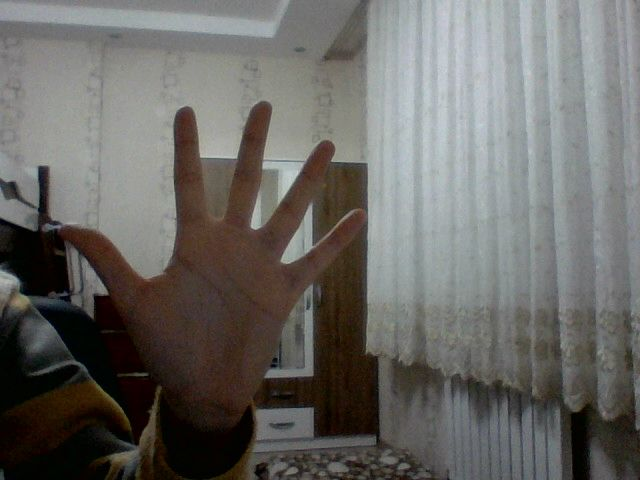

[5 8 1]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [89]:
from IPython.display import Image

# Bilgisayarımızın kamerasından anlık çektiğimiz görüntümüzü tahmin ettik.
try:
  filename = take_photo("photo.jpg")
  display(Image(filename))
  img = image.load_img(path, target_size=(64, 64))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  images = images.reshape(-1, 64, 64, 1)
  classes = model.predict(images, batch_size=10)
  sonuc = np.argmax(classes, axis = 1)
  print(sonuc)
  print(classes[0])

except Exception as err:
  print(str(err))